<a href="https://colab.research.google.com/github/divyagithubpro/Classifying-handwritten-digits/blob/main/Classifying_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!git clone https://github.com/divyagithubpro/Classifying-handwritten-digits.git

Cloning into 'Classifying-handwritten-digits'...


Import Libraries and Load Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load MNIST dataset using TensorFlow Keras API
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images for consistency with your original code
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

# Convert labels to numpy arrays (already done by keras)
train_labels = np.asarray(train_labels, dtype=np.int32)
test_labels = np.asarray(test_labels, dtype=np.int32)

# Limit the data to a maximum number of examples
max_examples = 10000
train_images = train_images[:max_examples]
train_labels = train_labels[:max_examples]


Display Dataset Images

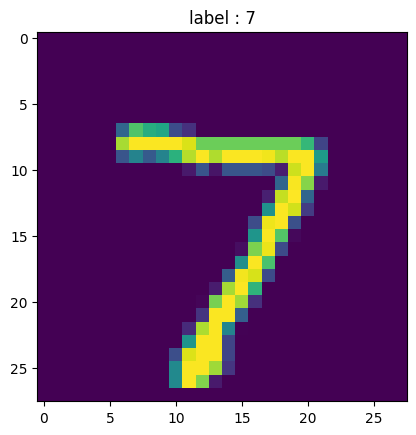

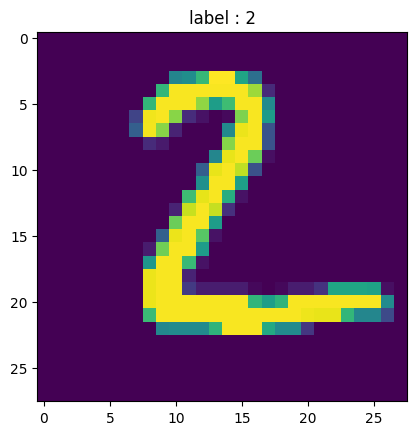

In [ ]:
# Cell 2: Displaying dataset images

# Display dataset using Matplotlib
def display(i):
    img = test_images[i]
    plt.title('label : {}'.format(test_labels[i]))
    plt.imshow(img.reshape((28, 28)))
    plt.show()

# Example: Display the first 2 image in the test set
display(0)
display(1)

Define Model and Train

In [ ]:
# Cell 3: Define and train the model

# Define a simple neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training model...")
model.fit(train_images, train_labels, epochs=10, batch_size=100)
print("Training complete.")


Training model...
Epoch 1/10
100/100 [==============================] - 2s 7ms/step - loss: 0.7339 - accuracy: 0.8100
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - loss: 0.2992 - accuracy: 0.9156
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.2351 - accuracy: 0.9347
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1961 - accuracy: 0.9443
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1663 - accuracy: 0.9529
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 0.1410 - accuracy: 0.9621
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1222 - accuracy: 0.9676
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1063 - accuracy: 0.9723
Epoch 9/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0921 - accuracy: 0.9758
Epoch 10/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0802 

Evaluate Model

In [ ]:
# Cell 4: Evaluate model

# Evaluate the model on the test set
print("Evaluating model...")
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test set accuracy: {test_accuracy:.3f}")


Evaluating model...
313/313 [==============================] - 1s 2ms/step - loss: 0.1794 - accuracy: 0.9475
Test set accuracy: 0.947


Predict and Display Results


1/1 [==============================] - 0s 114ms/step
Prediction: 4, Label: 4


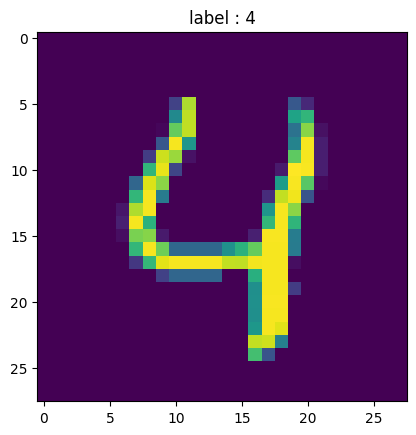

In [ ]:
# Cell 5: Predict and display results

# Find the index of the first '4' in the test labels
index_of_4 = np.argmax(test_labels == 4)

# Predict using the found index
predictions = model.predict(np.array([test_images[index_of_4]]))
predicted_label = np.argmax(predictions[0])

print("Prediction: {}, Label: {}".format(predicted_label, test_labels[index_of_4]))

# Display the image if the prediction is correct
if predicted_label == test_labels[index_of_4]:
    display(index_of_4)
